In [11]:
import numpy as np
import torch
# from arsf_envi_reader import envi_header
import shutil
import os
import json
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr
from scipy.optimize import curve_fit
# from tqdm import tqdm
# import multiprocess as mp
from scipy import ndimage
from numpy import trapz

In [12]:
high_res_img = gdal.Open(r'E:\wenqu\trait_map\update1\trait_map_with_scale\site6_add\site6add_d13c_trait_scaled.tif')
high_res_radiance = gdal.Open(r'E:\wenqu\trait_map\update1\trait_map_with_scale\site6_add\site6add_d13c_trait_scaled.tif').ReadAsArray() 

high_res_radiance.shape

(6076, 5538)

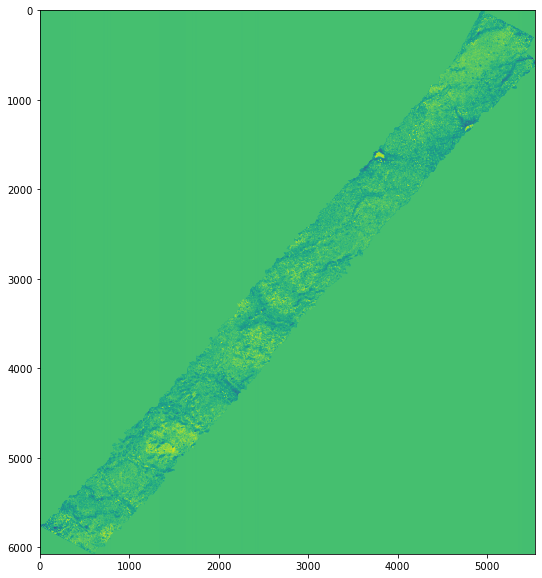

In [13]:
fig = plt.figure(figsize = (10,10))
plt.imshow(high_res_radiance, interpolation='nearest')
plt.show()

In [14]:
# Load the .npy file
data = np.load(r'E:\wenqu\numpy_file\npy_file\site6_add\b1_std.npy')

In [15]:
pj = high_res_img.GetProjection()  ## projection
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize

In [16]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site6add_b1_std_normal.tif"
outPath =r'E:\wenqu\trait_map\update1\trait_map_with_scale\site6_add\std'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)

In [17]:
out_ds.GetRasterBand(1).WriteArray(data)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds